# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create reference to CSV file
csv_path = "../output_data/cities.csv"

# Import the CSV into a pandas DataFrame
cities_df = pd.read_csv(csv_path, low_memory=False)
cities_df




,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [3]:
lats = []
longs = []
max_temps = []
humidities = []
cloudinesses = []
wind_speeds = []
countries = []
dates = []

url = "http://api.openweathermap.org/data/2.5/weather?"

for i in range(10):
    for city in cities:
        print(f"Processing Record {i} | {city}")
        query_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        try:
            temperature = weather_json["main"]["temp"]
            print(f"The temperature in {city} is {temperature} F.")
            lats.append(weather_json["coord"]["lat"])
            longs.append(weather_json["coord"]["lon"])
            max_temps.append(weather_json["main"]["temp_max"])
            humidities.append(weather_json["main"]["humidity"])
            cloudinesses.append(weather_json["weather"]["main"])
            wind_speeds.append(weather_json["wind"]["speed"])
            countries.append(weather_json["sys"]["country"])
            dates.append(weather_json["dt"])

        except:
            print("City not found, skipping...")
            pass

Processing Record 0 | san quintin
The temperature in san quintin is 54.21 F.
City not found, skipping...
Processing Record 0 | taolanaro
City not found, skipping...
Processing Record 0 | hermanus
The temperature in hermanus is 81 F.
City not found, skipping...
Processing Record 0 | palabuhanratu
City not found, skipping...
Processing Record 0 | hammerfest
The temperature in hammerfest is 23 F.
City not found, skipping...
Processing Record 0 | oussouye
The temperature in oussouye is 78.76 F.
City not found, skipping...
Processing Record 0 | mataura
The temperature in mataura is 64.33 F.
City not found, skipping...
Processing Record 0 | iqaluit
The temperature in iqaluit is 30.09 F.
City not found, skipping...
Processing Record 0 | port alfred
The temperature in port alfred is 75.99 F.
City not found, skipping...
Processing Record 0 | mtinko
The temperature in mtinko is 70.38 F.
City not found, skipping...
Processing Record 0 | busselton
The temperature in busselton is 61 F.
City not fou

Processing Record 0 | havre-saint-pierre
The temperature in havre-saint-pierre is 17.6 F.
City not found, skipping...
Processing Record 0 | pitimbu
The temperature in pitimbu is 82.4 F.
City not found, skipping...
Processing Record 0 | talaya
The temperature in talaya is -15.45 F.
City not found, skipping...
Processing Record 0 | ushuaia
The temperature in ushuaia is 53.6 F.
City not found, skipping...
Processing Record 0 | the valley
The temperature in the valley is 75.97 F.
City not found, skipping...
Processing Record 0 | half moon bay
The temperature in half moon bay is 45.48 F.
City not found, skipping...
Processing Record 0 | port-cartier
The temperature in port-cartier is 17.76 F.
City not found, skipping...
Processing Record 0 | ponta do sol
The temperature in ponta do sol is 62.17 F.
City not found, skipping...
Processing Record 0 | guanica
The temperature in guanica is 72.86 F.
City not found, skipping...
Processing Record 0 | saskylakh
The temperature in saskylakh is -32.87 

The temperature in bani walid is 70.74 F.
City not found, skipping...
Processing Record 0 | timizart
The temperature in timizart is 60.93 F.
City not found, skipping...
Processing Record 0 | severo-kurilsk
The temperature in severo-kurilsk is 20.64 F.
City not found, skipping...
Processing Record 0 | komyshuvakha
The temperature in komyshuvakha is 21.09 F.
City not found, skipping...
Processing Record 0 | grand river south east
City not found, skipping...
Processing Record 0 | kyra
The temperature in kyra is 11.14 F.
City not found, skipping...
Processing Record 0 | hasaki
The temperature in hasaki is 40.33 F.
City not found, skipping...
Processing Record 0 | constitucion
The temperature in constitucion is 59.9 F.
City not found, skipping...
Processing Record 0 | mahibadhoo
The temperature in mahibadhoo is 82.35 F.
City not found, skipping...
Processing Record 0 | fort nelson
The temperature in fort nelson is -27.4 F.
City not found, skipping...
Processing Record 0 | phangnga
The tempe

City not found, skipping...
Processing Record 0 | kisangani
The temperature in kisangani is 95 F.
City not found, skipping...
Processing Record 0 | lesozavodsk
The temperature in lesozavodsk is -2.76 F.
City not found, skipping...
Processing Record 0 | cabedelo
The temperature in cabedelo is 82.4 F.
City not found, skipping...
Processing Record 0 | leh
The temperature in leh is 22.82 F.
City not found, skipping...
Processing Record 0 | srednekolymsk
The temperature in srednekolymsk is 3.25 F.
City not found, skipping...
Processing Record 0 | las cruces
The temperature in las cruces is 46.54 F.
City not found, skipping...
Processing Record 0 | dengzhou
The temperature in dengzhou is 31.82 F.
City not found, skipping...
Processing Record 0 | tabiauea
City not found, skipping...
Processing Record 0 | tecoanapa
The temperature in tecoanapa is 72.36 F.
City not found, skipping...
Processing Record 0 | cordele
The temperature in cordele is 36.55 F.
City not found, skipping...
Processing Reco

The temperature in henderson is 45.5 F.
City not found, skipping...
Processing Record 0 | saravan
The temperature in saravan is 53.6 F.
City not found, skipping...
Processing Record 0 | wilmington
The temperature in wilmington is 32.72 F.
City not found, skipping...
Processing Record 0 | alice springs
The temperature in alice springs is 88.18 F.
City not found, skipping...
Processing Record 0 | georgetown
The temperature in georgetown is 87.33 F.
City not found, skipping...
Processing Record 0 | deori khas
The temperature in deori khas is 76.23 F.
City not found, skipping...
Processing Record 0 | ondorhaan
City not found, skipping...
Processing Record 0 | barsovo
The temperature in barsovo is 3.2 F.
City not found, skipping...
Processing Record 0 | lysyye gory
The temperature in lysyye gory is 2.3 F.
City not found, skipping...
Processing Record 0 | chagda
City not found, skipping...
Processing Record 0 | saint-augustin
The temperature in saint-augustin is 21.67 F.
City not found, skip

The temperature in xiuyan is 17.42 F.
City not found, skipping...
Processing Record 0 | salinopolis
The temperature in salinopolis is 81.73 F.
City not found, skipping...
Processing Record 0 | maxixe
The temperature in maxixe is 89.6 F.
City not found, skipping...
Processing Record 0 | fiche
The temperature in fiche is 67.17 F.
City not found, skipping...
Processing Record 0 | camana
The temperature in camana is 72.54 F.
City not found, skipping...
Processing Record 0 | karratha
The temperature in karratha is 81.09 F.
City not found, skipping...
Processing Record 0 | juneau
The temperature in juneau is 12.6 F.
City not found, skipping...
Processing Record 0 | buala
The temperature in buala is 80.94 F.
City not found, skipping...
Processing Record 0 | tari
The temperature in tari is 92.59 F.
City not found, skipping...
Processing Record 0 | katangli
The temperature in katangli is 6.46 F.
City not found, skipping...
Processing Record 0 | sao joao da barra
The temperature in sao joao da b

The temperature in ambilobe is 84.85 F.
City not found, skipping...
Processing Record 0 | diapaga
The temperature in diapaga is 97.59 F.
City not found, skipping...
Processing Record 0 | saldanha
The temperature in saldanha is 80.6 F.
City not found, skipping...
Processing Record 0 | tailai
The temperature in tailai is 5.23 F.
City not found, skipping...
Processing Record 0 | vestmanna
The temperature in vestmanna is 35.6 F.
City not found, skipping...
Processing Record 0 | san carlos del zulia
The temperature in san carlos del zulia is 74.37 F.
City not found, skipping...
Processing Record 0 | novovorontsovka
The temperature in novovorontsovka is 25.41 F.
City not found, skipping...
Processing Record 0 | beirut
The temperature in beirut is 68 F.
City not found, skipping...
Processing Record 0 | nushki
The temperature in nushki is 74.07 F.
City not found, skipping...
Processing Record 0 | toyooka
The temperature in toyooka is 33.8 F.
City not found, skipping...
Processing Record 0 | is

The temperature in lavrentiya is -4.58 F.
City not found, skipping...
Processing Record 0 | asyut
The temperature in asyut is 82.9 F.
City not found, skipping...
Processing Record 0 | ust-ilimsk
The temperature in ust-ilimsk is 22.01 F.
City not found, skipping...
Processing Record 0 | masvingo
The temperature in masvingo is 79.81 F.
City not found, skipping...
Processing Record 0 | tezu
The temperature in tezu is 65.53 F.
City not found, skipping...
Processing Record 0 | san jose
The temperature in san jose is 45.1 F.
City not found, skipping...
Processing Record 0 | machilipatnam
The temperature in machilipatnam is 86 F.
City not found, skipping...
Processing Record 0 | dondo
The temperature in dondo is 89.6 F.
City not found, skipping...
Processing Record 0 | coquimbo
The temperature in coquimbo is 57.2 F.
City not found, skipping...
Processing Record 0 | kodinsk
The temperature in kodinsk is 17.17 F.
City not found, skipping...
Processing Record 0 | nivala
The temperature in nivala

The temperature in souillac is 86 F.
City not found, skipping...
Processing Record 1 | rikitea
The temperature in rikitea is 77.04 F.
City not found, skipping...
Processing Record 1 | ambon
The temperature in ambon is 80.1 F.
City not found, skipping...
Processing Record 1 | hobyo
The temperature in hobyo is 81.23 F.
City not found, skipping...
Processing Record 1 | katsuura
The temperature in katsuura is 42.82 F.
City not found, skipping...
Processing Record 1 | bengkulu
The temperature in bengkulu is 80.6 F.
City not found, skipping...
Processing Record 1 | cooma
The temperature in cooma is 53.6 F.
City not found, skipping...
Processing Record 1 | hilo
The temperature in hilo is 64.35 F.
City not found, skipping...
Processing Record 1 | hobart
The temperature in hobart is 54.36 F.
City not found, skipping...
Processing Record 1 | la ronge
The temperature in la ronge is -32.8 F.
City not found, skipping...
Processing Record 1 | nizhneyansk
City not found, skipping...
Processing Record

The temperature in colorado springs is 15.3 F.
City not found, skipping...
Processing Record 1 | atambua
The temperature in atambua is 75.99 F.
City not found, skipping...
Processing Record 1 | inverell
The temperature in inverell is 66.83 F.
City not found, skipping...
Processing Record 1 | peruibe
The temperature in peruibe is 77.88 F.
City not found, skipping...
Processing Record 1 | makakilo city
The temperature in makakilo city is 63.05 F.
City not found, skipping...
Processing Record 1 | sabha
The temperature in sabha is 73.02 F.
City not found, skipping...
Processing Record 1 | labuhan
The temperature in labuhan is 80.58 F.
City not found, skipping...
Processing Record 1 | pangai
The temperature in pangai is 77.88 F.
City not found, skipping...
Processing Record 1 | pacific grove
The temperature in pacific grove is 49.19 F.
City not found, skipping...
Processing Record 1 | tuktoyaktuk
The temperature in tuktoyaktuk is -28.3 F.
City not found, skipping...
Processing Record 1 | za

The temperature in vila is 46 F.
City not found, skipping...
Processing Record 1 | xuddur
The temperature in xuddur is 94.62 F.
City not found, skipping...
Processing Record 1 | arraial do cabo
The temperature in arraial do cabo is 71.6 F.
City not found, skipping...
Processing Record 1 | sao filipe
The temperature in sao filipe is 70.41 F.
City not found, skipping...
Processing Record 1 | itapora
The temperature in itapora is 72.77 F.
City not found, skipping...
Processing Record 1 | sept-iles
The temperature in sept-iles is 17.06 F.
City not found, skipping...
Processing Record 1 | pathein
The temperature in pathein is 70.93 F.
City not found, skipping...
Processing Record 1 | tuatapere
The temperature in tuatapere is 61.23 F.
City not found, skipping...
Processing Record 1 | platanos
The temperature in platanos is 56.77 F.
City not found, skipping...
Processing Record 1 | guiyang
The temperature in guiyang is 46.4 F.
City not found, skipping...
Processing Record 1 | petropavl
The te

The temperature in milkovo is 11.7 F.
City not found, skipping...
Processing Record 1 | acari
The temperature in acari is 74.1 F.
City not found, skipping...
Processing Record 1 | port elizabeth
The temperature in port elizabeth is 75.2 F.
City not found, skipping...
Processing Record 1 | murgab
The temperature in murgab is 55.4 F.
City not found, skipping...
Processing Record 1 | awbari
The temperature in awbari is 71.58 F.
City not found, skipping...
Processing Record 1 | belciugatele
The temperature in belciugatele is 42.8 F.
City not found, skipping...
Processing Record 1 | horsham
The temperature in horsham is 29.37 F.
City not found, skipping...
Processing Record 1 | bac lieu
The temperature in bac lieu is 77.74 F.
City not found, skipping...
Processing Record 1 | tanout
The temperature in tanout is 84.34 F.
City not found, skipping...
Processing Record 1 | uralets
The temperature in uralets is -15.38 F.
City not found, skipping...
Processing Record 1 | smirnykh
The temperature i

The temperature in vostok is -9.92 F.
City not found, skipping...
Processing Record 1 | suao
City not found, skipping...
Processing Record 1 | mykolayiv
The temperature in mykolayiv is 24.4 F.
City not found, skipping...
Processing Record 1 | tawang
The temperature in tawang is 36.3 F.
City not found, skipping...
Processing Record 1 | mopipi
The temperature in mopipi is 83.79 F.
City not found, skipping...
Processing Record 1 | hamilton
The temperature in hamilton is 15.03 F.
City not found, skipping...
Processing Record 1 | riyadh
The temperature in riyadh is 66.2 F.
City not found, skipping...
Processing Record 1 | koslan
The temperature in koslan is -15.7 F.
City not found, skipping...
Processing Record 1 | ostrovnoy
The temperature in ostrovnoy is 0.55 F.
City not found, skipping...
Processing Record 1 | baiyin
The temperature in baiyin is 37.24 F.
City not found, skipping...
Processing Record 1 | san juan
The temperature in san juan is 63.55 F.
City not found, skipping...
Processi

The temperature in rafaela is 72.41 F.
City not found, skipping...
Processing Record 1 | grand-santi
The temperature in grand-santi is 75.34 F.
City not found, skipping...
Processing Record 1 | dalaba
The temperature in dalaba is 84.74 F.
City not found, skipping...
Processing Record 1 | namibe
The temperature in namibe is 80.6 F.
City not found, skipping...
Processing Record 1 | yar-sale
The temperature in yar-sale is -13.13 F.
City not found, skipping...
Processing Record 1 | wanaka
The temperature in wanaka is 58.23 F.
City not found, skipping...
Processing Record 1 | muroto
The temperature in muroto is 44.6 F.
City not found, skipping...
Processing Record 1 | korla
The temperature in korla is 36.01 F.
City not found, skipping...
Processing Record 1 | byron bay
The temperature in byron bay is 72.59 F.
City not found, skipping...
Processing Record 1 | temerloh
The temperature in temerloh is 77.05 F.
City not found, skipping...
Processing Record 1 | coihaique
The temperature in coihai

City not found, skipping...
Processing Record 1 | kamenka
The temperature in kamenka is 3.6 F.
City not found, skipping...
Processing Record 1 | trelleborg
The temperature in trelleborg is 27.93 F.
City not found, skipping...
Processing Record 1 | tiksi
The temperature in tiksi is -26.37 F.
City not found, skipping...
Processing Record 1 | maloshuyka
City not found, skipping...
Processing Record 1 | itamaraca
The temperature in itamaraca is 82.4 F.
City not found, skipping...
Processing Record 1 | fuxin
The temperature in fuxin is 20.28 F.
City not found, skipping...
Processing Record 1 | yumen
The temperature in yumen is 33.73 F.
City not found, skipping...
Processing Record 1 | coruripe
The temperature in coruripe is 83.7 F.
City not found, skipping...
Processing Record 1 | kloulklubed
The temperature in kloulklubed is 78.8 F.
City not found, skipping...
Processing Record 1 | menongue
The temperature in menongue is 79.74 F.
City not found, skipping...
Processing Record 1 | hualmay
Th

The temperature in kapaa is 62.6 F.
City not found, skipping...
Processing Record 2 | richards bay
The temperature in richards bay is 83.46 F.
City not found, skipping...
Processing Record 2 | jamestown
The temperature in jamestown is 8.6 F.
City not found, skipping...
Processing Record 2 | winslow
The temperature in winslow is 21.2 F.
City not found, skipping...
Processing Record 2 | port hardy
The temperature in port hardy is 34.5 F.
City not found, skipping...
Processing Record 2 | puerto suarez
The temperature in puerto suarez is 70.54 F.
City not found, skipping...
Processing Record 2 | kluczbork
The temperature in kluczbork is 23 F.
City not found, skipping...
Processing Record 2 | northam
The temperature in northam is 35.33 F.
City not found, skipping...
Processing Record 2 | dong xoai
The temperature in dong xoai is 75.61 F.
City not found, skipping...
Processing Record 2 | quatre cocos
The temperature in quatre cocos is 86 F.
City not found, skipping...
Processing Record 2 | t

The temperature in kolokani is 90.36 F.
City not found, skipping...
Processing Record 2 | saint-philippe
The temperature in saint-philippe is 82.08 F.
City not found, skipping...
Processing Record 2 | tasiilaq
The temperature in tasiilaq is 19.4 F.
City not found, skipping...
Processing Record 2 | dikson
The temperature in dikson is -29.7 F.
City not found, skipping...
Processing Record 2 | fukue
The temperature in fukue is 46.27 F.
City not found, skipping...
Processing Record 2 | sioux lookout
The temperature in sioux lookout is -29.2 F.
City not found, skipping...
Processing Record 2 | miraflores
The temperature in miraflores is 53.6 F.
City not found, skipping...
Processing Record 2 | gubkinskiy
The temperature in gubkinskiy is -3.42 F.
City not found, skipping...
Processing Record 2 | naliya
The temperature in naliya is 80.11 F.
City not found, skipping...
Processing Record 2 | yamada
The temperature in yamada is 21.74 F.
City not found, skipping...
Processing Record 2 | lolua
Cit

The temperature in buenos aires is 68.27 F.
City not found, skipping...
Processing Record 2 | isangel
The temperature in isangel is 77.94 F.
City not found, skipping...
Processing Record 2 | bahia de caraquez
The temperature in bahia de caraquez is 77 F.
City not found, skipping...
Processing Record 2 | bereda
The temperature in bereda is 46.99 F.
City not found, skipping...
Processing Record 2 | ilulissat
The temperature in ilulissat is 24.8 F.
City not found, skipping...
Processing Record 2 | airai
The temperature in airai is 61.38 F.
City not found, skipping...
Processing Record 2 | blackwater
The temperature in blackwater is 77.81 F.
City not found, skipping...
Processing Record 2 | bethel
The temperature in bethel is 11.25 F.
City not found, skipping...
Processing Record 2 | kangaatsiaq
The temperature in kangaatsiaq is 18.95 F.
City not found, skipping...
Processing Record 2 | gizo
The temperature in gizo is 83.64 F.
City not found, skipping...
Processing Record 2 | mogadishu
The

The temperature in svoboda nad upou is 19.06 F.
City not found, skipping...
Processing Record 2 | la orilla
The temperature in la orilla is 67.6 F.
City not found, skipping...
Processing Record 2 | warrington
The temperature in warrington is 35.64 F.
City not found, skipping...
Processing Record 2 | vaitupu
City not found, skipping...
Processing Record 2 | harper
The temperature in harper is 82.71 F.
City not found, skipping...
Processing Record 2 | salalah
The temperature in salalah is 80.6 F.
City not found, skipping...
Processing Record 2 | feira de santana
The temperature in feira de santana is 79.45 F.
City not found, skipping...
Processing Record 2 | nan
The temperature in nan is 71.6 F.
City not found, skipping...
Processing Record 2 | sisimiut
The temperature in sisimiut is 19.54 F.
City not found, skipping...
Processing Record 2 | mar del plata
The temperature in mar del plata is 63.41 F.
City not found, skipping...
Processing Record 2 | ugoofaaru
The temperature in ugoofaaru 

The temperature in kristiinankaupunki is 20.05 F.
City not found, skipping...
Processing Record 2 | beidao
The temperature in beidao is 35.01 F.
City not found, skipping...
Processing Record 2 | inhambane
The temperature in inhambane is 89.6 F.
City not found, skipping...
Processing Record 2 | bulawayo
The temperature in bulawayo is 76.93 F.
City not found, skipping...
Processing Record 2 | puerto del rosario
The temperature in puerto del rosario is 68 F.
City not found, skipping...
Processing Record 2 | kunashak
The temperature in kunashak is -2.2 F.
City not found, skipping...
Processing Record 2 | saint-pierre
The temperature in saint-pierre is 83.32 F.
City not found, skipping...
Processing Record 2 | semey
The temperature in semey is 35.6 F.
City not found, skipping...
Processing Record 2 | hambantota
The temperature in hambantota is 82.4 F.
City not found, skipping...
Processing Record 2 | alofi
The temperature in alofi is 78.8 F.
City not found, skipping...
Processing Record 2 |

The temperature in gedo is 76.28 F.
City not found, skipping...
Processing Record 2 | razole
The temperature in razole is 84.2 F.
City not found, skipping...
Processing Record 2 | billings
The temperature in billings is -8.55 F.
City not found, skipping...
Processing Record 2 | iquique
The temperature in iquique is 69.8 F.
City not found, skipping...
Processing Record 2 | petropavlovsk-kamchatskiy
The temperature in petropavlovsk-kamchatskiy is 19.4 F.
City not found, skipping...
Processing Record 2 | lodi
The temperature in lodi is 44.06 F.
City not found, skipping...
Processing Record 2 | chumikan
The temperature in chumikan is -0.54 F.
City not found, skipping...
Processing Record 2 | kuching
The temperature in kuching is 79.38 F.
City not found, skipping...
Processing Record 2 | san cristobal
The temperature in san cristobal is 73.4 F.
City not found, skipping...
Processing Record 2 | tual
The temperature in tual is 83.73 F.
City not found, skipping...
Processing Record 2 | chase
T

The temperature in ancud is 52.68 F.
City not found, skipping...
Processing Record 2 | taltal
The temperature in taltal is 66.63 F.
City not found, skipping...
Processing Record 2 | husavik
The temperature in husavik is 30.2 F.
City not found, skipping...
Processing Record 2 | cilieni
The temperature in cilieni is 39.2 F.
City not found, skipping...
Processing Record 2 | general cepeda
The temperature in general cepeda is 54.68 F.
City not found, skipping...
Processing Record 2 | emerald
The temperature in emerald is 83.23 F.
City not found, skipping...
Processing Record 2 | bargal
City not found, skipping...
Processing Record 2 | salinas
The temperature in salinas is 47.41 F.
City not found, skipping...
Processing Record 2 | jinchang
The temperature in jinchang is 31.98 F.
City not found, skipping...
Processing Record 2 | la palma
The temperature in la palma is 52 F.
City not found, skipping...
Processing Record 2 | garden city
The temperature in garden city is 9.91 F.
City not found,

The temperature in rocha is 68.86 F.
City not found, skipping...
Processing Record 2 | asfi
The temperature in asfi is 61.86 F.
City not found, skipping...
Processing Record 2 | lagoa
The temperature in lagoa is 60.12 F.
City not found, skipping...
Processing Record 2 | saint anthony
The temperature in saint anthony is -11.31 F.
City not found, skipping...
Processing Record 2 | sao joao evangelista
The temperature in sao joao evangelista is 67.77 F.
City not found, skipping...
Processing Record 2 | yeletskiy
City not found, skipping...
Processing Record 2 | cabo san lucas
The temperature in cabo san lucas is 55.99 F.
City not found, skipping...
Processing Record 2 | malakal
The temperature in malakal is 97.95 F.
City not found, skipping...
Processing Record 2 | ormara
The temperature in ormara is 72.9 F.
City not found, skipping...
Processing Record 3 | san quintin
The temperature in san quintin is 54.21 F.
City not found, skipping...
Processing Record 3 | taolanaro
City not found, ski

The temperature in itupiranga is 77 F.
City not found, skipping...
Processing Record 3 | mahebourg
The temperature in mahebourg is 86 F.
City not found, skipping...
Processing Record 3 | severodvinsk
The temperature in severodvinsk is -2.2 F.
City not found, skipping...
Processing Record 3 | khatanga
The temperature in khatanga is -22.16 F.
City not found, skipping...
Processing Record 3 | hofn
The temperature in hofn is 33.8 F.
City not found, skipping...
Processing Record 3 | qui nhon
The temperature in qui nhon is 73.56 F.
City not found, skipping...
Processing Record 3 | oda
The temperature in oda is 35.6 F.
City not found, skipping...
Processing Record 3 | havre-saint-pierre
The temperature in havre-saint-pierre is 17.6 F.
City not found, skipping...
Processing Record 3 | pitimbu
The temperature in pitimbu is 82.4 F.
City not found, skipping...
Processing Record 3 | talaya
The temperature in talaya is -15.45 F.
City not found, skipping...
Processing Record 3 | ushuaia
The temperat

The temperature in port shepstone is 76.26 F.
City not found, skipping...
Processing Record 3 | kavaratti
The temperature in kavaratti is 82.98 F.
City not found, skipping...
Processing Record 3 | mys shmidta
City not found, skipping...
Processing Record 3 | bani walid
The temperature in bani walid is 70.74 F.
City not found, skipping...
Processing Record 3 | timizart
The temperature in timizart is 60.93 F.
City not found, skipping...
Processing Record 3 | severo-kurilsk
The temperature in severo-kurilsk is 20.64 F.
City not found, skipping...
Processing Record 3 | komyshuvakha
The temperature in komyshuvakha is 21.09 F.
City not found, skipping...
Processing Record 3 | grand river south east
City not found, skipping...
Processing Record 3 | kyra
The temperature in kyra is 11.14 F.
City not found, skipping...
Processing Record 3 | hasaki
The temperature in hasaki is 40.33 F.
City not found, skipping...
Processing Record 3 | constitucion
The temperature in constitucion is 59.9 F.
City n

The temperature in kavieng is 83.48 F.
City not found, skipping...
Processing Record 3 | tsihombe
City not found, skipping...
Processing Record 3 | kisangani
The temperature in kisangani is 95 F.
City not found, skipping...
Processing Record 3 | lesozavodsk
The temperature in lesozavodsk is -2.76 F.
City not found, skipping...
Processing Record 3 | cabedelo
The temperature in cabedelo is 82.4 F.
City not found, skipping...
Processing Record 3 | leh
The temperature in leh is 22.82 F.
City not found, skipping...
Processing Record 3 | srednekolymsk
The temperature in srednekolymsk is 3.25 F.
City not found, skipping...
Processing Record 3 | las cruces
The temperature in las cruces is 46.54 F.
City not found, skipping...
Processing Record 3 | dengzhou
The temperature in dengzhou is 31.82 F.
City not found, skipping...
Processing Record 3 | tabiauea
City not found, skipping...
Processing Record 3 | tecoanapa
The temperature in tecoanapa is 72.36 F.
City not found, skipping...
Processing Rec

The temperature in henderson is 45.5 F.
City not found, skipping...
Processing Record 3 | saravan
The temperature in saravan is 53.6 F.
City not found, skipping...
Processing Record 3 | wilmington
The temperature in wilmington is 32.72 F.
City not found, skipping...
Processing Record 3 | alice springs
The temperature in alice springs is 88.18 F.
City not found, skipping...
Processing Record 3 | georgetown
The temperature in georgetown is 87.33 F.
City not found, skipping...
Processing Record 3 | deori khas
The temperature in deori khas is 76.23 F.
City not found, skipping...
Processing Record 3 | ondorhaan
City not found, skipping...
Processing Record 3 | barsovo
The temperature in barsovo is 3.2 F.
City not found, skipping...
Processing Record 3 | lysyye gory
The temperature in lysyye gory is 2.3 F.
City not found, skipping...
Processing Record 3 | chagda
City not found, skipping...
Processing Record 3 | saint-augustin
The temperature in saint-augustin is 21.67 F.
City not found, skip

The temperature in maxixe is 89.6 F.
City not found, skipping...
Processing Record 3 | fiche
The temperature in fiche is 67.17 F.
City not found, skipping...
Processing Record 3 | camana
The temperature in camana is 72.54 F.
City not found, skipping...
Processing Record 3 | karratha
The temperature in karratha is 81.09 F.
City not found, skipping...
Processing Record 3 | juneau
The temperature in juneau is 12.6 F.
City not found, skipping...
Processing Record 3 | buala
The temperature in buala is 80.94 F.
City not found, skipping...
Processing Record 3 | tari
The temperature in tari is 92.59 F.
City not found, skipping...
Processing Record 3 | katangli
The temperature in katangli is 6.46 F.
City not found, skipping...
Processing Record 3 | sao joao da barra
The temperature in sao joao da barra is 71.6 F.
City not found, skipping...
Processing Record 3 | sahrak
City not found, skipping...
Processing Record 3 | avera
The temperature in avera is 31.24 F.
City not found, skipping...
Proces

The temperature in tailai is 5.23 F.
City not found, skipping...
Processing Record 3 | vestmanna
The temperature in vestmanna is 35.6 F.
City not found, skipping...
Processing Record 3 | san carlos del zulia
The temperature in san carlos del zulia is 74.37 F.
City not found, skipping...
Processing Record 3 | novovorontsovka
The temperature in novovorontsovka is 25.41 F.
City not found, skipping...
Processing Record 3 | beirut
The temperature in beirut is 68 F.
City not found, skipping...
Processing Record 3 | nushki
The temperature in nushki is 74.07 F.
City not found, skipping...
Processing Record 3 | toyooka
The temperature in toyooka is 33.8 F.
City not found, skipping...
Processing Record 3 | ishigaki
The temperature in ishigaki is 68 F.
City not found, skipping...
Processing Record 3 | moindou
The temperature in moindou is 73.4 F.
City not found, skipping...
Processing Record 3 | burkhala
City not found, skipping...
Processing Record 3 | bambanglipuro
The temperature in bambanglip

The temperature in lavrentiya is -4.58 F.
City not found, skipping...
Processing Record 3 | asyut
The temperature in asyut is 82.9 F.
City not found, skipping...
Processing Record 3 | ust-ilimsk
The temperature in ust-ilimsk is 22.01 F.
City not found, skipping...
Processing Record 3 | masvingo
The temperature in masvingo is 79.81 F.
City not found, skipping...
Processing Record 3 | tezu
The temperature in tezu is 65.53 F.
City not found, skipping...
Processing Record 3 | san jose
The temperature in san jose is 45.1 F.
City not found, skipping...
Processing Record 3 | machilipatnam
The temperature in machilipatnam is 86 F.
City not found, skipping...
Processing Record 3 | dondo
The temperature in dondo is 89.6 F.
City not found, skipping...
Processing Record 3 | coquimbo
The temperature in coquimbo is 57.2 F.
City not found, skipping...
Processing Record 3 | kodinsk
The temperature in kodinsk is 17.17 F.
City not found, skipping...
Processing Record 3 | nivala
The temperature in nivala

City not found, skipping...
Processing Record 4 | chokurdakh
The temperature in chokurdakh is -12.12 F.
City not found, skipping...
Processing Record 4 | lesosibirsk
The temperature in lesosibirsk is 19.04 F.
City not found, skipping...
Processing Record 4 | haibowan
City not found, skipping...
Processing Record 4 | souillac
The temperature in souillac is 86 F.
City not found, skipping...
Processing Record 4 | rikitea
The temperature in rikitea is 77.04 F.
City not found, skipping...
Processing Record 4 | ambon
The temperature in ambon is 80.1 F.
City not found, skipping...
Processing Record 4 | hobyo
The temperature in hobyo is 81.23 F.
City not found, skipping...
Processing Record 4 | katsuura
The temperature in katsuura is 42.82 F.
City not found, skipping...
Processing Record 4 | bengkulu
The temperature in bengkulu is 80.6 F.
City not found, skipping...
Processing Record 4 | cooma
The temperature in cooma is 53.6 F.
City not found, skipping...
Processing Record 4 | hilo
The temper

The temperature in bambous virieux is 86 F.
City not found, skipping...
Processing Record 4 | odienne
The temperature in odienne is 93.92 F.
City not found, skipping...
Processing Record 4 | krasnoselkup
The temperature in krasnoselkup is -6.39 F.
City not found, skipping...
Processing Record 4 | sampit
The temperature in sampit is 79 F.
City not found, skipping...
Processing Record 4 | progreso
The temperature in progreso is 73.71 F.
City not found, skipping...
Processing Record 4 | upington
The temperature in upington is 96.8 F.
City not found, skipping...
Processing Record 4 | colorado springs
The temperature in colorado springs is 15.75 F.
City not found, skipping...
Processing Record 4 | atambua
The temperature in atambua is 75.99 F.
City not found, skipping...
Processing Record 4 | inverell
The temperature in inverell is 66.83 F.
City not found, skipping...
Processing Record 4 | peruibe
The temperature in peruibe is 77.88 F.
City not found, skipping...
Processing Record 4 | makak

The temperature in fallon is 32.94 F.
City not found, skipping...
Processing Record 4 | talcahuano
The temperature in talcahuano is 57.2 F.
City not found, skipping...
Processing Record 4 | luorong
The temperature in luorong is 60.44 F.
City not found, skipping...
Processing Record 4 | sao geraldo do araguaia
The temperature in sao geraldo do araguaia is 77.04 F.
City not found, skipping...
Processing Record 4 | vila
The temperature in vila is 46 F.
City not found, skipping...
Processing Record 4 | xuddur
The temperature in xuddur is 94.62 F.
City not found, skipping...
Processing Record 4 | arraial do cabo
The temperature in arraial do cabo is 71.6 F.
City not found, skipping...
Processing Record 4 | sao filipe
The temperature in sao filipe is 70.41 F.
City not found, skipping...
Processing Record 4 | itapora
The temperature in itapora is 72.77 F.
City not found, skipping...
Processing Record 4 | sept-iles
The temperature in sept-iles is 17.06 F.
City not found, skipping...
Processing

The temperature in new norfolk is 51.94 F.
City not found, skipping...
Processing Record 4 | heswall
The temperature in heswall is 36.59 F.
City not found, skipping...
Processing Record 4 | payo
The temperature in payo is 76.41 F.
City not found, skipping...
Processing Record 4 | milkovo
The temperature in milkovo is 11.7 F.
City not found, skipping...
Processing Record 4 | acari
The temperature in acari is 74.1 F.
City not found, skipping...
Processing Record 4 | port elizabeth
The temperature in port elizabeth is 75.2 F.
City not found, skipping...
Processing Record 4 | murgab
The temperature in murgab is 55.4 F.
City not found, skipping...
Processing Record 4 | awbari
The temperature in awbari is 71.58 F.
City not found, skipping...
Processing Record 4 | belciugatele
The temperature in belciugatele is 42.8 F.
City not found, skipping...
Processing Record 4 | horsham
The temperature in horsham is 29.37 F.
City not found, skipping...
Processing Record 4 | bac lieu
The temperature in b

The temperature in mossendjo is 88.72 F.
City not found, skipping...
Processing Record 4 | karauzyak
City not found, skipping...
Processing Record 4 | vostok
The temperature in vostok is -9.92 F.
City not found, skipping...
Processing Record 4 | suao
City not found, skipping...
Processing Record 4 | mykolayiv
The temperature in mykolayiv is 24.4 F.
City not found, skipping...
Processing Record 4 | tawang
The temperature in tawang is 36.3 F.
City not found, skipping...
Processing Record 4 | mopipi
The temperature in mopipi is 83.79 F.
City not found, skipping...
Processing Record 4 | hamilton
The temperature in hamilton is 15.03 F.
City not found, skipping...
Processing Record 4 | riyadh
The temperature in riyadh is 66.2 F.
City not found, skipping...
Processing Record 4 | koslan
The temperature in koslan is -15.7 F.
City not found, skipping...
Processing Record 4 | ostrovnoy
The temperature in ostrovnoy is 0.55 F.
City not found, skipping...
Processing Record 4 | baiyin
The temperature

The temperature in grand-santi is 75.34 F.
City not found, skipping...
Processing Record 4 | dalaba
The temperature in dalaba is 84.74 F.
City not found, skipping...
Processing Record 4 | namibe
The temperature in namibe is 80.6 F.
City not found, skipping...
Processing Record 4 | yar-sale
The temperature in yar-sale is -13.13 F.
City not found, skipping...
Processing Record 4 | wanaka
The temperature in wanaka is 58.23 F.
City not found, skipping...
Processing Record 4 | muroto
The temperature in muroto is 44.6 F.
City not found, skipping...
Processing Record 4 | korla
The temperature in korla is 36.01 F.
City not found, skipping...
Processing Record 4 | byron bay
The temperature in byron bay is 72.59 F.
City not found, skipping...
Processing Record 4 | temerloh
The temperature in temerloh is 77.05 F.
City not found, skipping...
Processing Record 4 | coihaique
The temperature in coihaique is 48.2 F.
City not found, skipping...
Processing Record 4 | oxford
The temperature in oxford is 

The temperature in kamenka is 3.6 F.
City not found, skipping...
Processing Record 4 | trelleborg
The temperature in trelleborg is 27.93 F.
City not found, skipping...
Processing Record 4 | tiksi
The temperature in tiksi is -26.37 F.
City not found, skipping...
Processing Record 4 | maloshuyka
City not found, skipping...
Processing Record 4 | itamaraca
The temperature in itamaraca is 82.4 F.
City not found, skipping...
Processing Record 4 | fuxin
The temperature in fuxin is 20.28 F.
City not found, skipping...
Processing Record 4 | yumen
The temperature in yumen is 33.73 F.
City not found, skipping...
Processing Record 4 | coruripe
The temperature in coruripe is 83.7 F.
City not found, skipping...
Processing Record 4 | kloulklubed
The temperature in kloulklubed is 78.8 F.
City not found, skipping...
Processing Record 4 | menongue
The temperature in menongue is 79.74 F.
City not found, skipping...
Processing Record 4 | hualmay
The temperature in hualmay is 70.63 F.
City not found, skipp

The temperature in luanda is 89.6 F.
City not found, skipping...
Processing Record 5 | kapaa
The temperature in kapaa is 62.6 F.
City not found, skipping...
Processing Record 5 | richards bay
The temperature in richards bay is 83.46 F.
City not found, skipping...
Processing Record 5 | jamestown
The temperature in jamestown is 8.6 F.
City not found, skipping...
Processing Record 5 | winslow
The temperature in winslow is 21.2 F.
City not found, skipping...
Processing Record 5 | port hardy
The temperature in port hardy is 34.5 F.
City not found, skipping...
Processing Record 5 | puerto suarez
The temperature in puerto suarez is 70.54 F.
City not found, skipping...
Processing Record 5 | kluczbork
The temperature in kluczbork is 23 F.
City not found, skipping...
Processing Record 5 | northam
The temperature in northam is 35.33 F.
City not found, skipping...
Processing Record 5 | dong xoai
The temperature in dong xoai is 75.61 F.
City not found, skipping...
Processing Record 5 | quatre cocos

The temperature in lata is 56.61 F.
City not found, skipping...
Processing Record 5 | cortez
The temperature in cortez is 15.8 F.
City not found, skipping...
Processing Record 5 | kolokani
The temperature in kolokani is 90.36 F.
City not found, skipping...
Processing Record 5 | saint-philippe
The temperature in saint-philippe is 82.08 F.
City not found, skipping...
Processing Record 5 | tasiilaq
The temperature in tasiilaq is 19.4 F.
City not found, skipping...
Processing Record 5 | dikson
The temperature in dikson is -29.7 F.
City not found, skipping...
Processing Record 5 | fukue
The temperature in fukue is 46.27 F.
City not found, skipping...
Processing Record 5 | sioux lookout
The temperature in sioux lookout is -29.2 F.
City not found, skipping...
Processing Record 5 | miraflores
The temperature in miraflores is 53.6 F.
City not found, skipping...
Processing Record 5 | gubkinskiy
The temperature in gubkinskiy is -3.42 F.
City not found, skipping...
Processing Record 5 | naliya
The

The temperature in baghdad is 69.8 F.
City not found, skipping...
Processing Record 5 | envira
The temperature in envira is 73.9 F.
City not found, skipping...
Processing Record 5 | buenos aires
The temperature in buenos aires is 68.27 F.
City not found, skipping...
Processing Record 5 | isangel
The temperature in isangel is 77.94 F.
City not found, skipping...
Processing Record 5 | bahia de caraquez
The temperature in bahia de caraquez is 77 F.
City not found, skipping...
Processing Record 5 | bereda
The temperature in bereda is 46.99 F.
City not found, skipping...
Processing Record 5 | ilulissat
The temperature in ilulissat is 24.8 F.
City not found, skipping...
Processing Record 5 | airai
The temperature in airai is 61.38 F.
City not found, skipping...
Processing Record 5 | blackwater
The temperature in blackwater is 77.81 F.
City not found, skipping...
Processing Record 5 | bethel
The temperature in bethel is 11.25 F.
City not found, skipping...
Processing Record 5 | kangaatsiaq
Th

The temperature in svoboda nad upou is 19.06 F.
City not found, skipping...
Processing Record 5 | la orilla
The temperature in la orilla is 67.6 F.
City not found, skipping...
Processing Record 5 | warrington
The temperature in warrington is 35.64 F.
City not found, skipping...
Processing Record 5 | vaitupu
City not found, skipping...
Processing Record 5 | harper
The temperature in harper is 82.71 F.
City not found, skipping...
Processing Record 5 | salalah
The temperature in salalah is 80.6 F.
City not found, skipping...
Processing Record 5 | feira de santana
The temperature in feira de santana is 79.45 F.
City not found, skipping...
Processing Record 5 | nan
The temperature in nan is 71.6 F.
City not found, skipping...
Processing Record 5 | sisimiut
The temperature in sisimiut is 19.54 F.
City not found, skipping...
Processing Record 5 | mar del plata
The temperature in mar del plata is 63.41 F.
City not found, skipping...
Processing Record 5 | ugoofaaru
The temperature in ugoofaaru 

The temperature in puerto del rosario is 68 F.
City not found, skipping...
Processing Record 5 | kunashak
The temperature in kunashak is -2.2 F.
City not found, skipping...
Processing Record 5 | saint-pierre
The temperature in saint-pierre is 83.32 F.
City not found, skipping...
Processing Record 5 | semey
The temperature in semey is 35.6 F.
City not found, skipping...
Processing Record 5 | hambantota
The temperature in hambantota is 82.4 F.
City not found, skipping...
Processing Record 5 | alofi
The temperature in alofi is 78.8 F.
City not found, skipping...
Processing Record 5 | yasnaya polyana
The temperature in yasnaya polyana is 28.4 F.
City not found, skipping...
Processing Record 5 | falealupo
City not found, skipping...
Processing Record 5 | belmonte
The temperature in belmonte is 82.4 F.
City not found, skipping...
Processing Record 5 | lorengau
The temperature in lorengau is 83.05 F.
City not found, skipping...
Processing Record 5 | gushikawa
The temperature in gushikawa is 6

The temperature in petropavlovsk-kamchatskiy is 19.4 F.
City not found, skipping...
Processing Record 5 | lodi
The temperature in lodi is 44.06 F.
City not found, skipping...
Processing Record 5 | chumikan
The temperature in chumikan is -0.54 F.
City not found, skipping...
Processing Record 5 | kuching
The temperature in kuching is 79.38 F.
City not found, skipping...
Processing Record 5 | san cristobal
The temperature in san cristobal is 73.4 F.
City not found, skipping...
Processing Record 5 | tual
The temperature in tual is 83.73 F.
City not found, skipping...
Processing Record 5 | chase
The temperature in chase is 14.49 F.
City not found, skipping...
Processing Record 5 | andenes
The temperature in andenes is 32 F.
City not found, skipping...
Processing Record 5 | chauny
The temperature in chauny is 27.45 F.
City not found, skipping...
Processing Record 5 | aflu
City not found, skipping...
Processing Record 5 | kondinskoye
The temperature in kondinskoye is -11.56 F.
City not found,

The temperature in general cepeda is 54.68 F.
City not found, skipping...
Processing Record 5 | emerald
The temperature in emerald is 83.23 F.
City not found, skipping...
Processing Record 5 | bargal
City not found, skipping...
Processing Record 5 | salinas
The temperature in salinas is 47.41 F.
City not found, skipping...
Processing Record 5 | jinchang
The temperature in jinchang is 31.98 F.
City not found, skipping...
Processing Record 5 | la palma
The temperature in la palma is 52 F.
City not found, skipping...
Processing Record 5 | garden city
The temperature in garden city is 9.91 F.
City not found, skipping...
Processing Record 5 | panambi
The temperature in panambi is 69.39 F.
City not found, skipping...
Processing Record 5 | roald
The temperature in roald is 23 F.
City not found, skipping...
Processing Record 5 | laguna
The temperature in laguna is 41.68 F.
City not found, skipping...
Processing Record 5 | san rafael del sur
The temperature in san rafael del sur is 71.6 F.
City

City not found, skipping...
Processing Record 5 | cabo san lucas
The temperature in cabo san lucas is 55.99 F.
City not found, skipping...
Processing Record 5 | malakal
The temperature in malakal is 97.95 F.
City not found, skipping...
Processing Record 5 | ormara
The temperature in ormara is 72.9 F.
City not found, skipping...
Processing Record 6 | san quintin
The temperature in san quintin is 54.21 F.
City not found, skipping...
Processing Record 6 | taolanaro
City not found, skipping...
Processing Record 6 | hermanus
The temperature in hermanus is 81 F.
City not found, skipping...
Processing Record 6 | palabuhanratu
City not found, skipping...
Processing Record 6 | hammerfest
The temperature in hammerfest is 23 F.
City not found, skipping...
Processing Record 6 | oussouye
The temperature in oussouye is 78.76 F.
City not found, skipping...
Processing Record 6 | mataura
The temperature in mataura is 64.33 F.
City not found, skipping...
Processing Record 6 | iqaluit
The temperature in 

The temperature in qui nhon is 73.56 F.
City not found, skipping...
Processing Record 6 | oda
The temperature in oda is 35.6 F.
City not found, skipping...
Processing Record 6 | havre-saint-pierre
The temperature in havre-saint-pierre is 17.6 F.
City not found, skipping...
Processing Record 6 | pitimbu
The temperature in pitimbu is 82.4 F.
City not found, skipping...
Processing Record 6 | talaya
The temperature in talaya is -15.45 F.
City not found, skipping...
Processing Record 6 | ushuaia
The temperature in ushuaia is 53.6 F.
City not found, skipping...
Processing Record 6 | the valley
The temperature in the valley is 75.97 F.
City not found, skipping...
Processing Record 6 | half moon bay
The temperature in half moon bay is 45.48 F.
City not found, skipping...
Processing Record 6 | port-cartier
The temperature in port-cartier is 17.76 F.
City not found, skipping...
Processing Record 6 | ponta do sol
The temperature in ponta do sol is 62.17 F.
City not found, skipping...
Processing R

City not found, skipping...
Processing Record 6 | bani walid
The temperature in bani walid is 70.74 F.
City not found, skipping...
Processing Record 6 | timizart
The temperature in timizart is 60.93 F.
City not found, skipping...
Processing Record 6 | severo-kurilsk
The temperature in severo-kurilsk is 20.64 F.
City not found, skipping...
Processing Record 6 | komyshuvakha
The temperature in komyshuvakha is 21.09 F.
City not found, skipping...
Processing Record 6 | grand river south east
City not found, skipping...
Processing Record 6 | kyra
The temperature in kyra is 11.14 F.
City not found, skipping...
Processing Record 6 | hasaki
The temperature in hasaki is 40.33 F.
City not found, skipping...
Processing Record 6 | constitucion
The temperature in constitucion is 59.9 F.
City not found, skipping...
Processing Record 6 | mahibadhoo
The temperature in mahibadhoo is 82.35 F.
City not found, skipping...
Processing Record 6 | fort nelson
The temperature in fort nelson is -27.4 F.
City no

The temperature in kavieng is 83.48 F.
City not found, skipping...
Processing Record 6 | tsihombe
City not found, skipping...
Processing Record 6 | kisangani
The temperature in kisangani is 95 F.
City not found, skipping...
Processing Record 6 | lesozavodsk
The temperature in lesozavodsk is -2.76 F.
City not found, skipping...
Processing Record 6 | cabedelo
The temperature in cabedelo is 82.4 F.
City not found, skipping...
Processing Record 6 | leh
The temperature in leh is 22.82 F.
City not found, skipping...
Processing Record 6 | srednekolymsk
The temperature in srednekolymsk is 3.25 F.
City not found, skipping...
Processing Record 6 | las cruces
The temperature in las cruces is 46.54 F.
City not found, skipping...
Processing Record 6 | dengzhou
The temperature in dengzhou is 31.82 F.
City not found, skipping...
Processing Record 6 | tabiauea
City not found, skipping...
Processing Record 6 | tecoanapa
The temperature in tecoanapa is 72.36 F.
City not found, skipping...
Processing Rec

City not found, skipping...
Processing Record 6 | henderson
The temperature in henderson is 45.5 F.
City not found, skipping...
Processing Record 6 | saravan
The temperature in saravan is 53.6 F.
City not found, skipping...
Processing Record 6 | wilmington
The temperature in wilmington is 32.72 F.
City not found, skipping...
Processing Record 6 | alice springs
The temperature in alice springs is 88.18 F.
City not found, skipping...
Processing Record 6 | georgetown
The temperature in georgetown is 87.33 F.
City not found, skipping...
Processing Record 6 | deori khas
The temperature in deori khas is 76.23 F.
City not found, skipping...
Processing Record 6 | ondorhaan
City not found, skipping...
Processing Record 6 | barsovo
The temperature in barsovo is 3.2 F.
City not found, skipping...
Processing Record 6 | lysyye gory
The temperature in lysyye gory is 2.3 F.
City not found, skipping...
Processing Record 6 | chagda
City not found, skipping...
Processing Record 6 | saint-augustin
The te

The temperature in salinopolis is 81.73 F.
City not found, skipping...
Processing Record 6 | maxixe
The temperature in maxixe is 89.6 F.
City not found, skipping...
Processing Record 6 | fiche
The temperature in fiche is 67.17 F.
City not found, skipping...
Processing Record 6 | camana
The temperature in camana is 72.54 F.
City not found, skipping...
Processing Record 6 | karratha
The temperature in karratha is 81.09 F.
City not found, skipping...
Processing Record 6 | juneau
The temperature in juneau is 12.6 F.
City not found, skipping...
Processing Record 6 | buala
The temperature in buala is 80.94 F.
City not found, skipping...
Processing Record 6 | tari
The temperature in tari is 92.59 F.
City not found, skipping...
Processing Record 6 | katangli
The temperature in katangli is 6.46 F.
City not found, skipping...
Processing Record 6 | sao joao da barra
The temperature in sao joao da barra is 71.6 F.
City not found, skipping...
Processing Record 6 | sahrak
City not found, skipping...

The temperature in ambilobe is 84.85 F.
City not found, skipping...
Processing Record 6 | diapaga
The temperature in diapaga is 97.59 F.
City not found, skipping...
Processing Record 6 | saldanha
The temperature in saldanha is 80.6 F.
City not found, skipping...
Processing Record 6 | tailai
The temperature in tailai is 5.23 F.
City not found, skipping...
Processing Record 6 | vestmanna
The temperature in vestmanna is 35.6 F.
City not found, skipping...
Processing Record 6 | san carlos del zulia
The temperature in san carlos del zulia is 74.37 F.
City not found, skipping...
Processing Record 6 | novovorontsovka
The temperature in novovorontsovka is 25.41 F.
City not found, skipping...
Processing Record 6 | beirut
The temperature in beirut is 68 F.
City not found, skipping...
Processing Record 6 | nushki
The temperature in nushki is 74.07 F.
City not found, skipping...
Processing Record 6 | toyooka
The temperature in toyooka is 33.8 F.
City not found, skipping...
Processing Record 6 | is

The temperature in lakes entrance is 58.55 F.
City not found, skipping...
Processing Record 6 | lavrentiya
The temperature in lavrentiya is -4.58 F.
City not found, skipping...
Processing Record 6 | asyut
The temperature in asyut is 82.9 F.
City not found, skipping...
Processing Record 6 | ust-ilimsk
The temperature in ust-ilimsk is 22.01 F.
City not found, skipping...
Processing Record 6 | masvingo
The temperature in masvingo is 79.81 F.
City not found, skipping...
Processing Record 6 | tezu
The temperature in tezu is 65.53 F.
City not found, skipping...
Processing Record 6 | san jose
The temperature in san jose is 45.1 F.
City not found, skipping...
Processing Record 6 | machilipatnam
The temperature in machilipatnam is 86 F.
City not found, skipping...
Processing Record 6 | dondo
The temperature in dondo is 89.6 F.
City not found, skipping...
Processing Record 6 | coquimbo
The temperature in coquimbo is 57.2 F.
City not found, skipping...
Processing Record 6 | kodinsk
The temperatur

The temperature in rikitea is 77.04 F.
City not found, skipping...
Processing Record 7 | ambon
The temperature in ambon is 80.1 F.
City not found, skipping...
Processing Record 7 | hobyo
The temperature in hobyo is 81.23 F.
City not found, skipping...
Processing Record 7 | katsuura
The temperature in katsuura is 42.82 F.
City not found, skipping...
Processing Record 7 | bengkulu
The temperature in bengkulu is 80.6 F.
City not found, skipping...
Processing Record 7 | cooma
The temperature in cooma is 53.6 F.
City not found, skipping...
Processing Record 7 | hilo
The temperature in hilo is 64.35 F.
City not found, skipping...
Processing Record 7 | hobart
The temperature in hobart is 54.36 F.
City not found, skipping...
Processing Record 7 | la ronge
The temperature in la ronge is -32.8 F.
City not found, skipping...
Processing Record 7 | nizhneyansk
City not found, skipping...
Processing Record 7 | nador
The temperature in nador is 68.18 F.
City not found, skipping...
Processing Record 7

The temperature in atambua is 75.99 F.
City not found, skipping...
Processing Record 7 | inverell
The temperature in inverell is 66.83 F.
City not found, skipping...
Processing Record 7 | peruibe
The temperature in peruibe is 77.88 F.
City not found, skipping...
Processing Record 7 | makakilo city
The temperature in makakilo city is 63.05 F.
City not found, skipping...
Processing Record 7 | sabha
The temperature in sabha is 73.02 F.
City not found, skipping...
Processing Record 7 | labuhan
The temperature in labuhan is 80.58 F.
City not found, skipping...
Processing Record 7 | pangai
The temperature in pangai is 77.88 F.
City not found, skipping...
Processing Record 7 | pacific grove
The temperature in pacific grove is 49.19 F.
City not found, skipping...
Processing Record 7 | tuktoyaktuk
The temperature in tuktoyaktuk is -28.3 F.
City not found, skipping...
Processing Record 7 | zakharovo
The temperature in zakharovo is 3.85 F.
City not found, skipping...
Processing Record 7 | attawap

The temperature in vila is 46 F.
City not found, skipping...
Processing Record 7 | xuddur
The temperature in xuddur is 94.62 F.
City not found, skipping...
Processing Record 7 | arraial do cabo
The temperature in arraial do cabo is 71.6 F.
City not found, skipping...
Processing Record 7 | sao filipe
The temperature in sao filipe is 70.41 F.
City not found, skipping...
Processing Record 7 | itapora
The temperature in itapora is 72.77 F.
City not found, skipping...
Processing Record 7 | sept-iles
The temperature in sept-iles is 17.06 F.
City not found, skipping...
Processing Record 7 | pathein
The temperature in pathein is 70.93 F.
City not found, skipping...
Processing Record 7 | tuatapere
The temperature in tuatapere is 61.23 F.
City not found, skipping...
Processing Record 7 | platanos
The temperature in platanos is 56.77 F.
City not found, skipping...
Processing Record 7 | guiyang
The temperature in guiyang is 46.4 F.
City not found, skipping...
Processing Record 7 | petropavl
The te

The temperature in payo is 76.41 F.
City not found, skipping...
Processing Record 7 | milkovo
The temperature in milkovo is 11.7 F.
City not found, skipping...
Processing Record 7 | acari
The temperature in acari is 74.1 F.
City not found, skipping...
Processing Record 7 | port elizabeth
The temperature in port elizabeth is 75.2 F.
City not found, skipping...
Processing Record 7 | murgab
The temperature in murgab is 55.4 F.
City not found, skipping...
Processing Record 7 | awbari
The temperature in awbari is 71.58 F.
City not found, skipping...
Processing Record 7 | belciugatele
The temperature in belciugatele is 42.8 F.
City not found, skipping...
Processing Record 7 | horsham
The temperature in horsham is 29.37 F.
City not found, skipping...
Processing Record 7 | bac lieu
The temperature in bac lieu is 77.74 F.
City not found, skipping...
Processing Record 7 | tanout
The temperature in tanout is 84.34 F.
City not found, skipping...
Processing Record 7 | uralets
The temperature in ura

City not found, skipping...
Processing Record 7 | vostok
The temperature in vostok is -9.92 F.
City not found, skipping...
Processing Record 7 | suao
City not found, skipping...
Processing Record 7 | mykolayiv
The temperature in mykolayiv is 24.4 F.
City not found, skipping...
Processing Record 7 | tawang
The temperature in tawang is 36.3 F.
City not found, skipping...
Processing Record 7 | mopipi
The temperature in mopipi is 83.79 F.
City not found, skipping...
Processing Record 7 | hamilton
The temperature in hamilton is 15.03 F.
City not found, skipping...
Processing Record 7 | riyadh
The temperature in riyadh is 66.2 F.
City not found, skipping...
Processing Record 7 | koslan
The temperature in koslan is -15.7 F.
City not found, skipping...
Processing Record 7 | ostrovnoy
The temperature in ostrovnoy is 0.55 F.
City not found, skipping...
Processing Record 7 | baiyin
The temperature in baiyin is 37.24 F.
City not found, skipping...
Processing Record 7 | san juan
The temperature in 

The temperature in rafaela is 72.41 F.
City not found, skipping...
Processing Record 7 | grand-santi
The temperature in grand-santi is 75.34 F.
City not found, skipping...
Processing Record 7 | dalaba
The temperature in dalaba is 84.74 F.
City not found, skipping...
Processing Record 7 | namibe
The temperature in namibe is 80.6 F.
City not found, skipping...
Processing Record 7 | yar-sale
The temperature in yar-sale is -13.13 F.
City not found, skipping...
Processing Record 7 | wanaka
The temperature in wanaka is 58.23 F.
City not found, skipping...
Processing Record 7 | muroto
The temperature in muroto is 44.6 F.
City not found, skipping...
Processing Record 7 | korla
The temperature in korla is 36.01 F.
City not found, skipping...
Processing Record 7 | byron bay
The temperature in byron bay is 72.59 F.
City not found, skipping...
Processing Record 7 | temerloh
The temperature in temerloh is 77.05 F.
City not found, skipping...
Processing Record 7 | coihaique
The temperature in coihai

City not found, skipping...
Processing Record 7 | kamenka
The temperature in kamenka is 3.6 F.
City not found, skipping...
Processing Record 7 | trelleborg
The temperature in trelleborg is 27.93 F.
City not found, skipping...
Processing Record 7 | tiksi
The temperature in tiksi is -26.37 F.
City not found, skipping...
Processing Record 7 | maloshuyka
City not found, skipping...
Processing Record 7 | itamaraca
The temperature in itamaraca is 82.4 F.
City not found, skipping...
Processing Record 7 | fuxin
The temperature in fuxin is 20.28 F.
City not found, skipping...
Processing Record 7 | yumen
The temperature in yumen is 33.73 F.
City not found, skipping...
Processing Record 7 | coruripe
The temperature in coruripe is 83.7 F.
City not found, skipping...
Processing Record 7 | kloulklubed
The temperature in kloulklubed is 78.8 F.
City not found, skipping...
Processing Record 7 | menongue
The temperature in menongue is 79.74 F.
City not found, skipping...
Processing Record 7 | hualmay
Th

City not found, skipping...
Processing Record 8 | atuona
The temperature in atuona is 79.23 F.
City not found, skipping...
Processing Record 8 | luanda
The temperature in luanda is 89.6 F.
City not found, skipping...
Processing Record 8 | kapaa
The temperature in kapaa is 62.6 F.
City not found, skipping...
Processing Record 8 | richards bay
The temperature in richards bay is 83.46 F.
City not found, skipping...
Processing Record 8 | jamestown
The temperature in jamestown is 8.6 F.
City not found, skipping...
Processing Record 8 | winslow
The temperature in winslow is 21.2 F.
City not found, skipping...
Processing Record 8 | port hardy
The temperature in port hardy is 34.5 F.
City not found, skipping...
Processing Record 8 | puerto suarez
The temperature in puerto suarez is 70.54 F.
City not found, skipping...
Processing Record 8 | kluczbork
The temperature in kluczbork is 23 F.
City not found, skipping...
Processing Record 8 | northam
The temperature in northam is 35.33 F.
City not fo

The temperature in lata is 56.61 F.
City not found, skipping...
Processing Record 8 | cortez
The temperature in cortez is 15.8 F.
City not found, skipping...
Processing Record 8 | kolokani
The temperature in kolokani is 90.36 F.
City not found, skipping...
Processing Record 8 | saint-philippe
The temperature in saint-philippe is 82.08 F.
City not found, skipping...
Processing Record 8 | tasiilaq
The temperature in tasiilaq is 19.4 F.
City not found, skipping...
Processing Record 8 | dikson
The temperature in dikson is -29.7 F.
City not found, skipping...
Processing Record 8 | fukue
The temperature in fukue is 46.27 F.
City not found, skipping...
Processing Record 8 | sioux lookout
The temperature in sioux lookout is -29.2 F.
City not found, skipping...
Processing Record 8 | miraflores
The temperature in miraflores is 53.6 F.
City not found, skipping...
Processing Record 8 | gubkinskiy
The temperature in gubkinskiy is -3.42 F.
City not found, skipping...
Processing Record 8 | naliya
The

Processing Record 8 | envira
The temperature in envira is 73.9 F.
City not found, skipping...
Processing Record 8 | buenos aires
The temperature in buenos aires is 68.27 F.
City not found, skipping...
Processing Record 8 | isangel
The temperature in isangel is 77.94 F.
City not found, skipping...
Processing Record 8 | bahia de caraquez
The temperature in bahia de caraquez is 77 F.
City not found, skipping...
Processing Record 8 | bereda
The temperature in bereda is 46.99 F.
City not found, skipping...
Processing Record 8 | ilulissat
The temperature in ilulissat is 24.8 F.
City not found, skipping...
Processing Record 8 | airai
The temperature in airai is 61.38 F.
City not found, skipping...
Processing Record 8 | blackwater
The temperature in blackwater is 77.81 F.
City not found, skipping...
Processing Record 8 | bethel
The temperature in bethel is 11.25 F.
City not found, skipping...
Processing Record 8 | kangaatsiaq
The temperature in kangaatsiaq is 18.95 F.
City not found, skipping.

City not found, skipping...
Processing Record 8 | harper
The temperature in harper is 82.71 F.
City not found, skipping...
Processing Record 8 | salalah
The temperature in salalah is 80.6 F.
City not found, skipping...
Processing Record 8 | feira de santana
The temperature in feira de santana is 79.45 F.
City not found, skipping...
Processing Record 8 | nan
The temperature in nan is 71.6 F.
City not found, skipping...
Processing Record 8 | sisimiut
The temperature in sisimiut is 19.54 F.
City not found, skipping...
Processing Record 8 | mar del plata
The temperature in mar del plata is 63.41 F.
City not found, skipping...
Processing Record 8 | ugoofaaru
The temperature in ugoofaaru is 81.63 F.
City not found, skipping...
Processing Record 8 | klaksvik
The temperature in klaksvik is 35.6 F.
City not found, skipping...
Processing Record 8 | eenhana
The temperature in eenhana is 86 F.
City not found, skipping...
Processing Record 8 | tono
The temperature in tono is 15.37 F.
City not found

The temperature in kunashak is -2.2 F.
City not found, skipping...
Processing Record 8 | saint-pierre
The temperature in saint-pierre is 83.32 F.
City not found, skipping...
Processing Record 8 | semey
The temperature in semey is 35.6 F.
City not found, skipping...
Processing Record 8 | hambantota
The temperature in hambantota is 82.4 F.
City not found, skipping...
Processing Record 8 | alofi
The temperature in alofi is 78.8 F.
City not found, skipping...
Processing Record 8 | yasnaya polyana
The temperature in yasnaya polyana is 28.4 F.
City not found, skipping...
Processing Record 8 | falealupo
City not found, skipping...
Processing Record 8 | belmonte
The temperature in belmonte is 82.4 F.
City not found, skipping...
Processing Record 8 | lorengau
The temperature in lorengau is 83.05 F.
City not found, skipping...
Processing Record 8 | gushikawa
The temperature in gushikawa is 60.51 F.
City not found, skipping...
Processing Record 8 | taoudenni
The temperature in taoudenni is 73.94 

The temperature in billings is -8.55 F.
City not found, skipping...
Processing Record 8 | iquique
The temperature in iquique is 69.8 F.
City not found, skipping...
Processing Record 8 | petropavlovsk-kamchatskiy
The temperature in petropavlovsk-kamchatskiy is 19.4 F.
City not found, skipping...
Processing Record 8 | lodi
The temperature in lodi is 44.06 F.
City not found, skipping...
Processing Record 8 | chumikan
The temperature in chumikan is -0.54 F.
City not found, skipping...
Processing Record 8 | kuching
The temperature in kuching is 79.38 F.
City not found, skipping...
Processing Record 8 | san cristobal
The temperature in san cristobal is 73.4 F.
City not found, skipping...
Processing Record 8 | tual
The temperature in tual is 83.73 F.
City not found, skipping...
Processing Record 8 | chase
The temperature in chase is 14.49 F.
City not found, skipping...
Processing Record 8 | andenes
The temperature in andenes is 32 F.
City not found, skipping...
Processing Record 8 | chauny
Th

The temperature in cilieni is 39.2 F.
City not found, skipping...
Processing Record 8 | general cepeda
The temperature in general cepeda is 54.68 F.
City not found, skipping...
Processing Record 8 | emerald
The temperature in emerald is 83.23 F.
City not found, skipping...
Processing Record 8 | bargal
City not found, skipping...
Processing Record 8 | salinas
The temperature in salinas is 47.41 F.
City not found, skipping...
Processing Record 8 | jinchang
The temperature in jinchang is 31.98 F.
City not found, skipping...
Processing Record 8 | la palma
The temperature in la palma is 52 F.
City not found, skipping...
Processing Record 8 | garden city
The temperature in garden city is 9.91 F.
City not found, skipping...
Processing Record 8 | panambi
The temperature in panambi is 69.39 F.
City not found, skipping...
Processing Record 8 | roald
The temperature in roald is 23 F.
City not found, skipping...
Processing Record 8 | laguna
The temperature in laguna is 41.68 F.
City not found, ski

The temperature in rocha is 68.86 F.
City not found, skipping...
Processing Record 8 | asfi
The temperature in asfi is 61.86 F.
City not found, skipping...
Processing Record 8 | lagoa
The temperature in lagoa is 60.12 F.
City not found, skipping...
Processing Record 8 | saint anthony
The temperature in saint anthony is -11.31 F.
City not found, skipping...
Processing Record 8 | sao joao evangelista
The temperature in sao joao evangelista is 67.77 F.
City not found, skipping...
Processing Record 8 | yeletskiy
City not found, skipping...
Processing Record 8 | cabo san lucas
The temperature in cabo san lucas is 55.99 F.
City not found, skipping...
Processing Record 8 | malakal
The temperature in malakal is 97.95 F.
City not found, skipping...
Processing Record 8 | ormara
The temperature in ormara is 72.9 F.
City not found, skipping...
Processing Record 9 | san quintin
The temperature in san quintin is 54.21 F.
City not found, skipping...
Processing Record 9 | taolanaro
City not found, ski

The temperature in itupiranga is 77 F.
City not found, skipping...
Processing Record 9 | mahebourg
The temperature in mahebourg is 86 F.
City not found, skipping...
Processing Record 9 | severodvinsk
The temperature in severodvinsk is -2.2 F.
City not found, skipping...
Processing Record 9 | khatanga
The temperature in khatanga is -22.16 F.
City not found, skipping...
Processing Record 9 | hofn
The temperature in hofn is 33.8 F.
City not found, skipping...
Processing Record 9 | qui nhon
The temperature in qui nhon is 73.56 F.
City not found, skipping...
Processing Record 9 | oda
The temperature in oda is 35.6 F.
City not found, skipping...
Processing Record 9 | havre-saint-pierre
The temperature in havre-saint-pierre is 17.6 F.
City not found, skipping...
Processing Record 9 | pitimbu
The temperature in pitimbu is 82.4 F.
City not found, skipping...
Processing Record 9 | talaya
The temperature in talaya is -15.45 F.
City not found, skipping...
Processing Record 9 | ushuaia
The temperat

The temperature in puerto escondido is 75.49 F.
City not found, skipping...
Processing Record 9 | schaumburg
The temperature in schaumburg is 0.14 F.
City not found, skipping...
Processing Record 9 | lerwick
The temperature in lerwick is 30.2 F.
City not found, skipping...
Processing Record 9 | port shepstone
The temperature in port shepstone is 76.26 F.
City not found, skipping...
Processing Record 9 | kavaratti
The temperature in kavaratti is 82.98 F.
City not found, skipping...
Processing Record 9 | mys shmidta
City not found, skipping...
Processing Record 9 | bani walid
The temperature in bani walid is 70.74 F.
City not found, skipping...
Processing Record 9 | timizart
The temperature in timizart is 60.93 F.
City not found, skipping...
Processing Record 9 | severo-kurilsk
The temperature in severo-kurilsk is 20.64 F.
City not found, skipping...
Processing Record 9 | komyshuvakha
The temperature in komyshuvakha is 21.09 F.
City not found, skipping...
Processing Record 9 | grand rive

The temperature in kyzyl-suu is 38.55 F.
City not found, skipping...
Processing Record 9 | kokopo
The temperature in kokopo is 80.33 F.
City not found, skipping...
Processing Record 9 | kavieng
The temperature in kavieng is 83.48 F.
City not found, skipping...
Processing Record 9 | tsihombe
City not found, skipping...
Processing Record 9 | kisangani
The temperature in kisangani is 95 F.
City not found, skipping...
Processing Record 9 | lesozavodsk
The temperature in lesozavodsk is -2.76 F.
City not found, skipping...
Processing Record 9 | cabedelo
The temperature in cabedelo is 82.4 F.
City not found, skipping...
Processing Record 9 | leh
The temperature in leh is 22.82 F.
City not found, skipping...
Processing Record 9 | srednekolymsk
The temperature in srednekolymsk is 3.25 F.
City not found, skipping...
Processing Record 9 | las cruces
The temperature in las cruces is 46.54 F.
City not found, skipping...
Processing Record 9 | dengzhou
The temperature in dengzhou is 31.82 F.
City not

The temperature in mount gambier is 55.4 F.
City not found, skipping...
Processing Record 9 | henderson
The temperature in henderson is 45.5 F.
City not found, skipping...
Processing Record 9 | saravan
The temperature in saravan is 53.6 F.
City not found, skipping...
Processing Record 9 | wilmington
The temperature in wilmington is 32.72 F.
City not found, skipping...
Processing Record 9 | alice springs
The temperature in alice springs is 88.18 F.
City not found, skipping...
Processing Record 9 | georgetown
The temperature in georgetown is 87.33 F.
City not found, skipping...
Processing Record 9 | deori khas
The temperature in deori khas is 76.23 F.
City not found, skipping...
Processing Record 9 | ondorhaan
City not found, skipping...
Processing Record 9 | barsovo
The temperature in barsovo is 3.2 F.
City not found, skipping...
Processing Record 9 | lysyye gory
The temperature in lysyye gory is 2.3 F.
City not found, skipping...
Processing Record 9 | chagda
City not found, skipping...

The temperature in maxixe is 89.6 F.
City not found, skipping...
Processing Record 9 | fiche
The temperature in fiche is 67.17 F.
City not found, skipping...
Processing Record 9 | camana
The temperature in camana is 72.54 F.
City not found, skipping...
Processing Record 9 | karratha
The temperature in karratha is 81.09 F.
City not found, skipping...
Processing Record 9 | juneau
The temperature in juneau is 12.6 F.
City not found, skipping...
Processing Record 9 | buala
The temperature in buala is 80.94 F.
City not found, skipping...
Processing Record 9 | tari
The temperature in tari is 92.59 F.
City not found, skipping...
Processing Record 9 | katangli
The temperature in katangli is 6.46 F.
City not found, skipping...
Processing Record 9 | sao joao da barra
The temperature in sao joao da barra is 71.6 F.
City not found, skipping...
Processing Record 9 | sahrak
City not found, skipping...
Processing Record 9 | avera
The temperature in avera is 31.24 F.
City not found, skipping...
Proces

The temperature in tailai is 5.23 F.
City not found, skipping...
Processing Record 9 | vestmanna
The temperature in vestmanna is 35.6 F.
City not found, skipping...
Processing Record 9 | san carlos del zulia
The temperature in san carlos del zulia is 74.37 F.
City not found, skipping...
Processing Record 9 | novovorontsovka
The temperature in novovorontsovka is 25.41 F.
City not found, skipping...
Processing Record 9 | beirut
The temperature in beirut is 68 F.
City not found, skipping...
Processing Record 9 | nushki
The temperature in nushki is 74.07 F.
City not found, skipping...
Processing Record 9 | toyooka
The temperature in toyooka is 33.8 F.
City not found, skipping...
Processing Record 9 | ishigaki
The temperature in ishigaki is 68 F.
City not found, skipping...
Processing Record 9 | moindou
The temperature in moindou is 73.4 F.
City not found, skipping...
Processing Record 9 | burkhala
City not found, skipping...
Processing Record 9 | bambanglipuro
The temperature in bambanglip

The temperature in lavrentiya is -4.58 F.
City not found, skipping...
Processing Record 9 | asyut
The temperature in asyut is 82.9 F.
City not found, skipping...
Processing Record 9 | ust-ilimsk
The temperature in ust-ilimsk is 22.01 F.
City not found, skipping...
Processing Record 9 | masvingo
The temperature in masvingo is 79.81 F.
City not found, skipping...
Processing Record 9 | tezu
The temperature in tezu is 65.53 F.
City not found, skipping...
Processing Record 9 | san jose
The temperature in san jose is 45.1 F.
City not found, skipping...
Processing Record 9 | machilipatnam
The temperature in machilipatnam is 86 F.
City not found, skipping...
Processing Record 9 | dondo
The temperature in dondo is 89.6 F.
City not found, skipping...
Processing Record 9 | coquimbo
The temperature in coquimbo is 57.2 F.
City not found, skipping...
Processing Record 9 | kodinsk
The temperature in kodinsk is 17.17 F.
City not found, skipping...
Processing Record 9 | nivala
The temperature in nivala

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# weather_dict = {"City": cities, "Lat": lats, "Lng": longs, "Max Temp": max_temps, "Humidity": humidities, "Cloudiness": cloudinesses, "Wind Speed": wind_speeds, "Country": countries, "Date": dates}
# weather_data = pd.DataFrame(weather_dict)
# weather_data.to_csv("weather_data.csv", encoding="utf-8", index=True)
# weather_data


In [5]:
#City_ID	City	Cloudiness	Country	Date	Humidity	Lat	Lng	Max Temp	Wind Speed
cities_df = cities_df[["City_ID", "City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]
cities_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,ostrovnoy,68.05,39.51,37.50,72,2,7.16,RU,1558378754
1,1,mahebourg,-20.41,57.70,78.80,74,75,11.41,MU,1558378503
2,2,qaanaaq,77.48,-69.36,22.20,73,25,2.37,GL,1558378755
3,3,zhuhai,40.71,112.04,44.60,39,0,4.47,CN,1558378755
4,4,cape town,-33.93,18.42,55.99,76,20,8.05,ZA,1558378755


In [6]:
cities_df.describe()

,City_ID,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,273.500000,19.665146,20.675529,64.970785,67.671533,49.405109,8.672682,1.558379e+09
std,158.338246,33.623560,90.307948,18.704318,23.697626,36.914201,5.865974,7.820486e+01
min,0.000000,-54.810000,-173.230000,4.920000,4.000000,0.000000,0.540000,1.558378e+09
25%,136.750000,-6.267500,-61.015000,53.970000,52.000000,13.750000,4.680000,1.558379e+09
50%,273.500000,21.390000,21.240000,64.990000,71.000000,46.500000,7.010000,1.558379e+09
75%,410.250000,47.887500,102.937500,80.600000,86.000000,81.000000,11.410000,1.558379e+09
max,547.000000,78.220000,179.320000,104.100000,290.000000,100.000000,46.080000,1.558379e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
cities_df.loc[cities_df["Humidity"] > 100, :]

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
129,129,paita,-5.09,-81.11,62.6,290,0,17.22,PE,1558378778


In [16]:
#  Get the indices of cities that have humidity over 100%.



,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_cities_df = cities_df.drop(cities_df[cities_df['Humidity'] > 100].index, inplace = False)
clean_cities_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,ostrovnoy,68.05,39.51,37.50,72,2,7.16,RU,1558378754
1,1,mahebourg,-20.41,57.70,78.80,74,75,11.41,MU,1558378503
2,2,qaanaaq,77.48,-69.36,22.20,73,25,2.37,GL,1558378755
3,3,zhuhai,40.71,112.04,44.60,39,0,4.47,CN,1558378755
4,4,cape town,-33.93,18.42,55.99,76,20,8.05,ZA,1558378755
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,33.97,36.66,80.60,32,0,8.05,SY,1558378840
544,544,paraiso,24.01,-104.61,84.20,4,5,16.11,MX,1558378898
545,545,veraval,49.65,0.71,61.00,62,0,8.05,FR,1558378898
546,546,novyy urgal,51.07,132.56,49.74,93,100,2.68,RU,1558378899


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

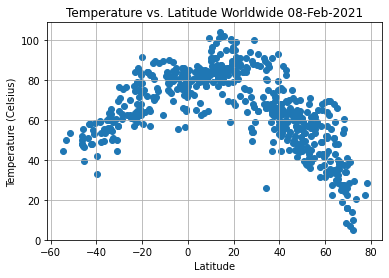

In [15]:
plt.scatter(clean_cities_df["Lat"], clean_cities_df["Max Temp"], marker="o")
plt.title("Temperature vs. Latitude Worldwide 08-Feb-2021")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("LatVStempWorld.png")

## Latitude vs. Humidity Plot

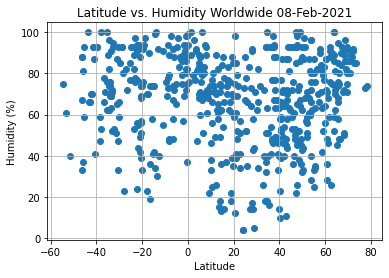

In [18]:
plt.scatter(clean_cities_df["Lat"], clean_cities_df["Humidity"], marker="o")
plt.title("Latitude vs. Humidity Worldwide 08-Feb-2021")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("LatVShumWorld.png")

## Latitude vs. Cloudiness Plot

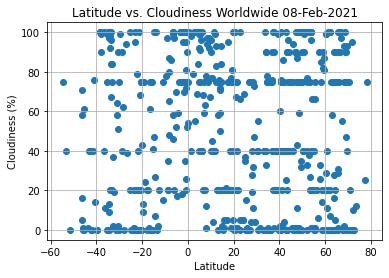

In [19]:
plt.scatter(clean_cities_df["Lat"], clean_cities_df["Cloudiness"], marker="o")
plt.title("Latitude vs. Cloudiness Worldwide 08-Feb-2021")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("LatVScloudWorld.png")

## Latitude vs. Wind Speed Plot

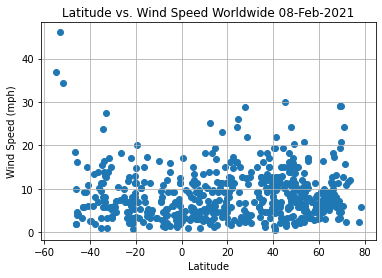

In [20]:
plt.scatter(clean_cities_df["Lat"], clean_cities_df["Wind Speed"], marker="o")
plt.title("Latitude vs. Wind Speed Worldwide 08-Feb-2021")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("LatVSwindWorld.png")

## Linear Regression

In [31]:
cities_NH = clean_cities_df.drop(clean_cities_df[clean_cities_df['Lat'] < 0].index, inplace = False)
# cities_NH
cities_SH = clean_cities_df.drop(clean_cities_df[clean_cities_df['Lat'] > 0].index, inplace = False)
# cities_SH

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,mahebourg,-20.41,57.70,78.80,74,75,11.41,MU,1558378503
4,4,cape town,-33.93,18.42,55.99,76,20,8.05,ZA,1558378755
5,5,atuona,-9.80,-139.03,81.96,76,78,16.49,PF,1558378755
6,6,flinders,-34.58,150.85,60.01,62,0,11.41,AU,1558378755
7,7,opuwo,-18.06,13.84,72.06,23,0,5.44,NaN,1558378523
...,...,...,...,...,...,...,...,...,...,...
526,526,viedma,-40.81,-62.99,58.56,41,14,10.98,AR,1558378894
531,531,russell,-33.01,-68.80,50.00,71,75,12.75,AR,1558378895
536,536,padang,-0.92,100.36,81.24,82,100,7.65,ID,1558378896
539,539,palu,-0.90,119.87,78.72,80,72,3.83,ID,1558378897


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6644951847801386


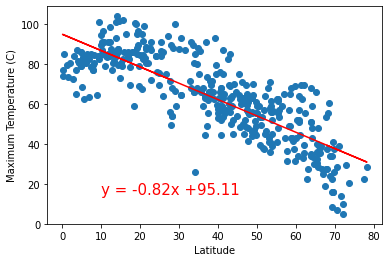

In [32]:
x_values = cities_NH["Lat"]
y_values = cities_NH["Max Temp"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (C)')
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatVStempNH-LR.png")
# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5880057276369802


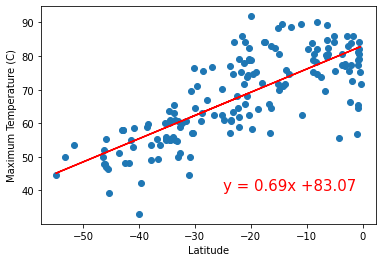

In [36]:
x_values = cities_SH["Lat"]
y_values = cities_SH["Max Temp"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (C)')
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatVStempSH-LR.png")
# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


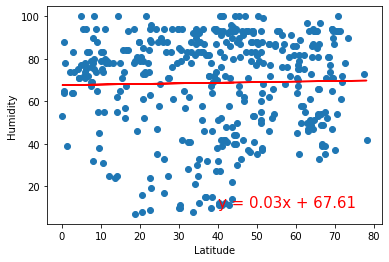

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


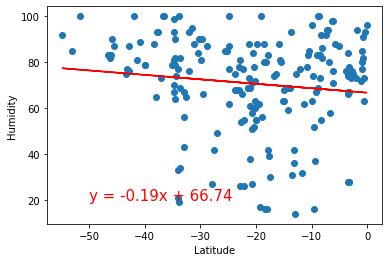

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


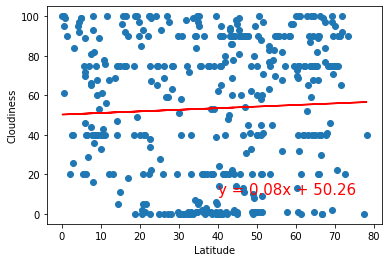

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


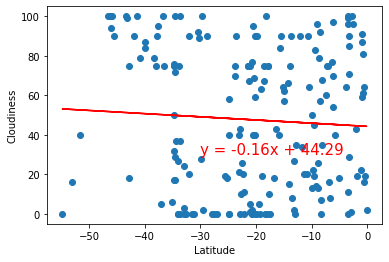

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


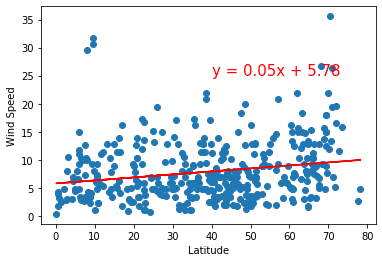

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


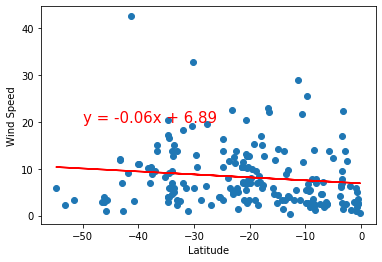